In [1]:
import matplotlib.pyplot as plt
import numpy   as np
import pandas  as pd
import seaborn as sns
from   sklearn.feature_selection import mutual_info_regression

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)

# Load Data
df = pd.read_csv('ames.csv')

/var/folders/cm/t16gz6kd6mvdqrhqvcg9f1fh0000gn/T/ipykernel_44670/2876817170.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
# Utility  functions from Tutorial
def make_mi_scores(X,y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width  = np.arange(len(scores))
    ticks  = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

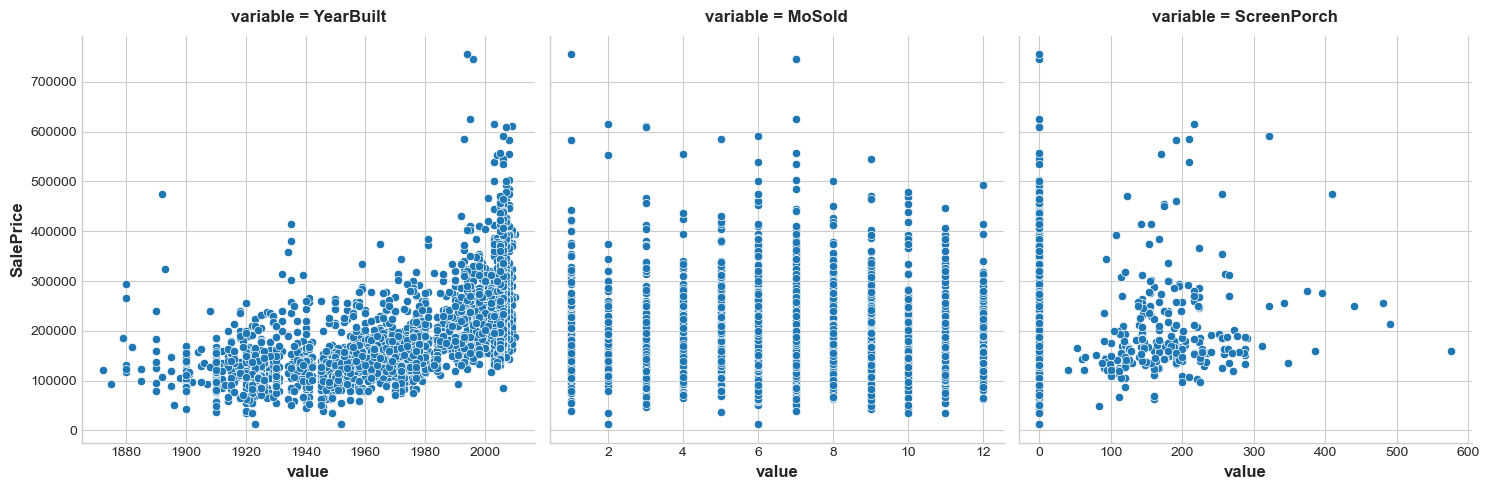

In [4]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice",value_vars=features), facet_kws=dict(sharex=False),
);

In [5]:
X = df.copy()
y = X.pop("SalePrice")

mi_scores = make_mi_scores(X,y)

OverallQual     0.578700
Neighborhood    0.556468
GrLivArea       0.493904
GarageArea      0.414343
YearBuilt       0.402562
GarageCars      0.398296
TotalBsmtSF     0.388701
FirstFlrSF      0.368483
BsmtQual        0.365384
KitchenQual     0.326059
ExterQual       0.323878
YearRemodAdd    0.300659
MSSubClass      0.289644
GarageFinish    0.279176
FullBath        0.268958
Foundation      0.240805
FireplaceQu     0.232167
LotFrontage     0.230507
GarageType      0.226196
SecondFlrSF     0.210406
Name: MI Scores, dtype: float64


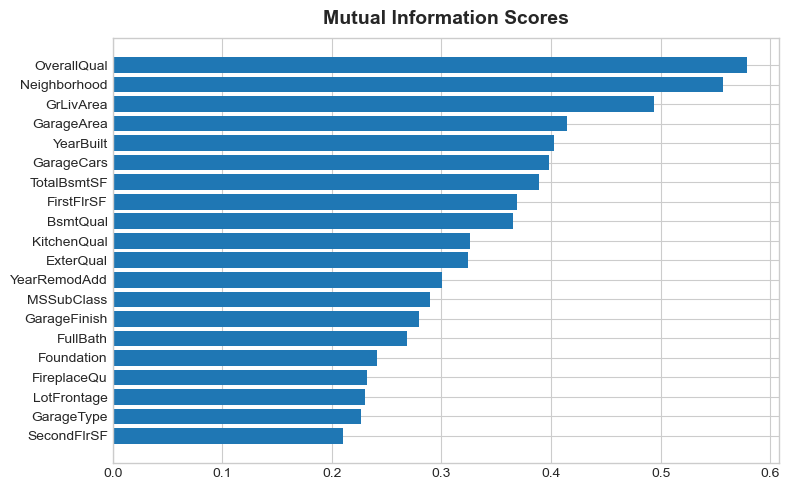

In [6]:
print(mi_scores.head(20))
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores.head(20))

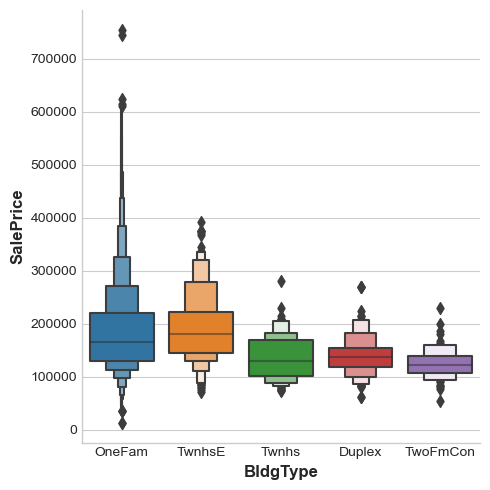

In [7]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

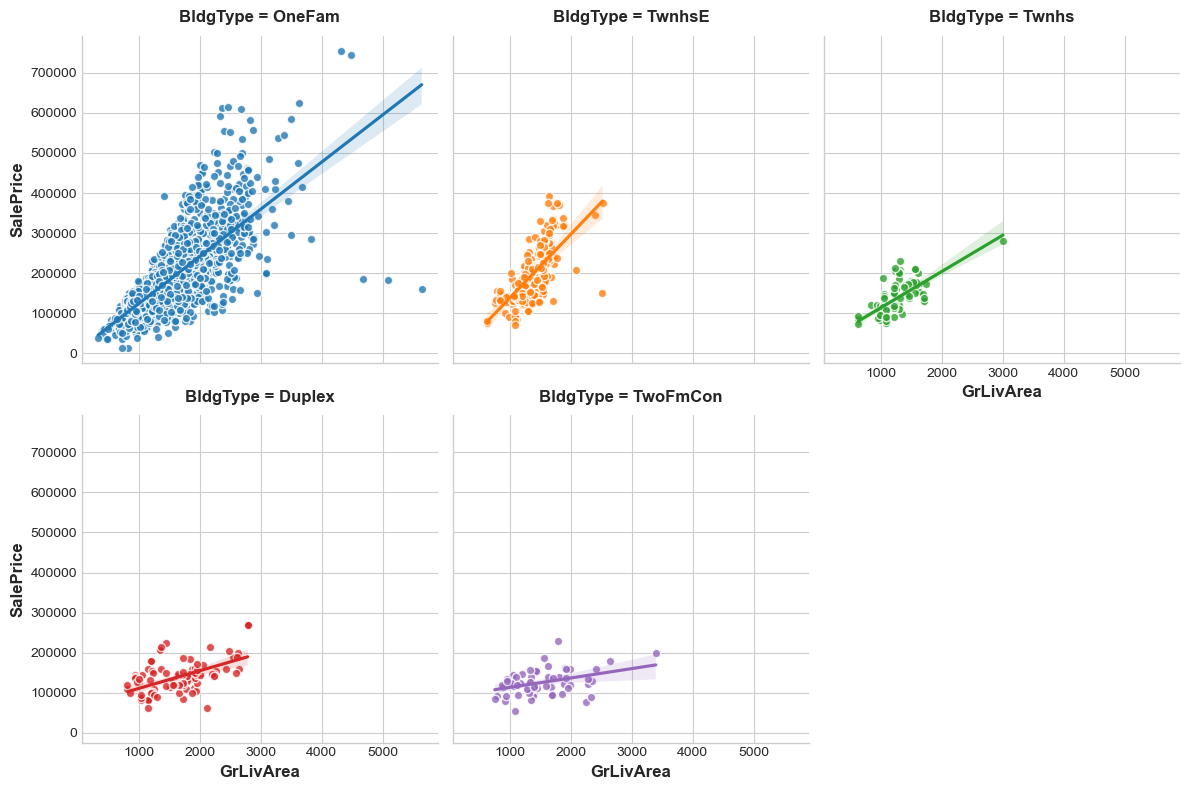

In [8]:
feature = "GrLivArea"

sns.lmplot(
    x = feature, y="SalePrice" , hue="BldgType" , col="BldgType",
    data =df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );